## This is a new added text b Ehsan

This is how a text is created in Ipython

In [49]:
#######
from __future__ import print_function
from jupyter_core.paths import jupyter_config_dir, jupyter_config_path
print(jupyter_config_dir())
print(jupyter_config_path())

/home/ehsan/.jupyter
['/home/ehsan/.jupyter', '/home/ehsan/anaconda/etc/jupyter', '/usr/local/etc/jupyter', '/etc/jupyter']


In [48]:
from __future__ import print_function
from jupyter_core.paths import jupyter_data_dir, jupyter_path
print(jupyter_data_dir())
print(jupyter_path())

/home/ehsan/.local/share/jupyter
['/home/ehsan/.local/share/jupyter', '/home/ehsan/anaconda/share/jupyter', '/usr/local/share/jupyter', '/usr/share/jupyter']


## How to load a Extension

This is how we load a notebook extension :)

In [47]:
import notebook
notebook.nbextensions.check_nbextension('usability/codefolding', user=True)
notebook.nbextensions.check_nbextension('usability/codefolding/main.js', user=True)

True

In [46]:
import notebook
import IPython.html.nbextensions as nb
E = notebook.nbextensions.EnableNBExtensionApp()
E.enable_nbextension('usability/codefolding/main')
ext= 'https://github.com/ipython-contrib/IPython-notebook-extensions/archive/3.x.zip'
nb.install_nbextension(ext)

downloading https://github.com/ipython-contrib/IPython-notebook-extensions/archive/3.x.zip to /tmp/tmp5keBn4/3.x.zip
extracting /tmp/tmp5keBn4/3.x.zip to /usr/local/share/jupyter/nbextensions


In [45]:
from IPython.html.services.config import ConfigManager
ip = get_ipython()
cm = ConfigManager(parent=ip, profile_dir=ip.profile_dir.location)
cm.update('notebook', {"load_extensions": {"IPython-notebook-extensions-3.x/usability/runtools/main": True}})

{u'load_extensions': {u'IPython-notebook-extensions-3.x/usability/runtools/main': True,
  u'publishing/codefolding/main': True,
  u'slidemode/codefolding/main': True,
  u'styling/codefolding/main': True,
  u'stylng/codefolding/main': True,
  u'usability/codefolding/main': True}}

In [78]:
from IPython.html.services.config import ConfigManager
from IPython.display import HTML
ip = get_ipython()
cm = ConfigManager(parent=ip, profile_dir=ip.profile_dir.location)
extensions =cm.get('notebook')
table = ""
for ext in extensions['load_extensions']:
    table += "<tr><td>%s</td>\n" % (ext)

top = """
<table border="1">
  <tr>
    <th>Extension name</th>
  </tr>
"""
bottom = """
</table>
"""
HTML(top + table + bottom)

Extension name
usability/codefolding/main
styling/codefolding/main
IPython-notebook-extensions-3.x/usability/runtools/main
stylng/codefolding/main
slidemode/codefolding/main
publishing/codefolding/main


In [79]:
%%javascript
IPython.Cell.options_default.cm_config.lineNumbers = true;

<IPython.core.display.Javascript object>

Toggle code

Es =  28.6358323176
dEs =  0.000207002882179


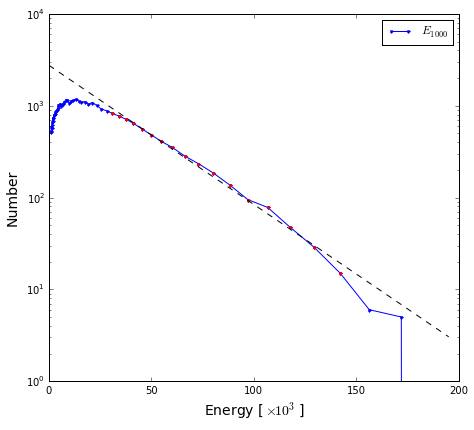

In [76]:
#*****************************************************************
#
#  NAME:		Ehsan Kourkchi
#
#  HOMEWORK:		6
#
#  CLASS:		Scientific Computation (IfA)
#
#  INSTRUCTOR:		Norbert Schorghofer
#
#  DATE:		October 18, 2015           
#
#  FILE:		ehsan.hw06.py
#
#  DESCRIPTION:	It uses the output of 'ehsan.hw06.py' to make histograms and other analysis.
#  
#  How to run: $ python ehsan.hist.py
#
#****************************************************************
%matplotlib inline

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
import numpy as np
from math import *
import matplotlib.pyplot as plt
from astropy.table import Table, Column 
import random
import sys
import os


# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)




if __name__ == '__main__':
  
  
  inFile = 'energies.v2.txt'
  table = np.genfromtxt(inFile , delimiter=',', filling_values=0, names=True, dtype=None)
  
  E1   = table['E1']
  E2  = table['E2']
  
  E1=E1[0:50000]
  E2=E2[0:50000]
  
  fig = plt.figure(figsize=(6.7, 6), dpi=100)
  ax = fig.add_axes([0.13, 0.1, 0.85,  0.85])
  
  
  Linear_Linear = False
  Log_Linear = False
  Log_Log = False
  Linear_Log = True
  
  
  if Linear_Linear:
    delt = 0.25
    bins = np.arange(0,20,delt)
    bins_center = np.arange(delt,20-0.5*delt,delt)
    n_E1 =  np.histogram(E1/1.E4, bins=bins)
    n_E2 =  np.histogram(E2/1.E4, bins=bins)
    n_E1 = n_E1[0]/1.E4
    n_E2 = n_E2[0]/1.E4
    ax.plot(bins_center, n_E1, label=r'$E_{2000}$')
    ax.plot(bins_center, n_E2, label=r'$E_{1000}$')

    ax.set_ylabel('Number ['+r'$\times 10^4$'+']', fontsize=14)
    ax.set_xlabel('Energy ['+r'$\times 10^4$'+']', fontsize=14)
    #ax.plot(bins_center, np.log10(n_E2), '.-',label=r'$E_{1000}$')
    #ax.plot(bins_center, np.log10(n_E1), '.-',label=r'$E_{1000}$')
  

  
  elif Log_Linear:
    delt = 0.25
    C = 1 + delt
    bins = [1]
    bins_center = [np.sqrt(C)]
    t = 1
    while t < 200.:
      bins.append(t*C)
      bins_center.append(t*C)
      t *= C
    bins_center = bins_center[0:len(bins_center)-1]
    
    
    n_E1 =  np.histogram(E1/1.E3, bins=bins)
    n_E2 =  np.histogram(E2/1.E3, bins=bins)
    n_E1 = n_E1[0]/1.E3
    n_E2 = n_E2[0]/1.E3
    ax.plot(bins_center, n_E1, '.-', label=r'$E_{2000}$')
    ax.plot(bins_center, n_E2, '.-',label=r'$E_{1000}$')

    ax.set_ylabel('Number ['+r'$\times 10^3$'+']', fontsize=14)
    ax.set_xlabel('Energy ['+r'$\times 10^3$'+']', fontsize=14)
    plt.xscale('log')


  elif Log_Log:
    delt = 0.1
    C = 1 + delt
    bins = [1]
    bins_center = [np.sqrt(C)]
    t = 1
    while t < 200.:
      bins.append(t*C)
      bins_center.append(t*C)
      t *= C
    bins_center = bins_center[0:len(bins_center)-1]
    
    
    n_E1 =  np.histogram(E1/1.E3, bins=bins)
    n_E2 =  np.histogram(E2/1.E3, bins=bins)
    n_E1 = n_E1[0]
    n_E2 = n_E2[0]
    ax.plot(bins_center, n_E1, '.-', label=r'$E_{2000}$')
    ax.plot(bins_center, n_E2, '.-',label=r'$E_{1000}$')

    ax.set_ylabel('Number', fontsize=14)
    ax.set_xlabel('Energy ['+r'$\times 10^3$'+']', fontsize=14)
    plt.xscale('log')
    plt.yscale('log')


    

  elif Linear_Log:
    delt = 0.1
    C = 1 + delt
    bins = [1]
    bins_center = [np.sqrt(C)]
    t = 1
    while t < 200.:
      bins.append(t*C)
      bins_center.append(t*C)
      t *= C
    bins_center = bins_center[0:len(bins_center)-1]
    
    
    n_E1 =  np.histogram(E1/1.E3, bins=bins)
    n_E2 =  np.histogram(E2/1.E3, bins=bins)
    n_E1 = n_E1[0]
    n_E2 = n_E2[0]

    ax.set_ylabel('Number', fontsize=14)
    ax.set_xlabel('Energy ['+r'$\times 10^3$'+']', fontsize=14)
    
    #ax.plot(bins_center, n_E2, '.-',label=r'$E_{1000}$')
    ax.plot(bins_center, n_E1, '.-',label=r'$E_{1000}$')
    plt.yscale('log')

   
    x = bins_center[len(bins_center)-20:len(bins_center)-3]
    y = n_E1[len(bins_center)-20:len(bins_center)-3]
    logy = np.log10(y)
    ax.plot(x, y,  '.', color='red')
    z, v = np.polyfit(x, logy, 1, full = False , cov=True)
    p = np.poly1d(z)
    x = np.arange(0,200,5)
    ax.plot(x, 10**(p(x)), '--', color ='black')
    Es = -1.*log10(np.exp(1))/z[0]
    dz =  v[0][0] 
    dEs = dz*log10(np.exp(1))/(z[0]**2)
    print ('Es = ', Es)
    print ('dEs = ', dEs  )
   

    #x = bins_center[len(bins_center)-20:len(bins_center)-3]
    #y = n_E2[len(bins_center)-20:len(bins_center)-3]
    #logy = np.log10(y)
    #ax.plot(x, y,  '.', color='red')
    #z, v = np.polyfit(x, logy, 1, full = False , cov=True)
    #p = np.poly1d(z)
    #x = np.arange(0,200,5)
    #ax.plot(x, 10**(p(x)), '--', color ='black')
    #Es = -1.*log10(np.exp(1))/z[0]
    #dz =  v[0][0] 
    #dEs = dz*log10(np.exp(1))/(z[0]**2)
    #print 'Es = ', Es
    #print 'dEs = ', dEs
    

   
  
  if Linear_Linear or Log_Linear or Log_Log or Linear_Log:
    ax.legend( loc=1 )
    #plt.show()
  

  

In [80]:

#*****************************************************************
#
#  NAME:		Ehsan Kourkchi
#
#  HOMEWORK:		6
#
#  CLASS:		Scientific Computation (IfA)
#
#  INSTRUCTOR:		Norbert Schorghofer
#
#  DATE:		October 18, 2015           
#
#  FILE:		ehsan.hw06.py
#
#  DESCRIPTION:	This code generates the energy of a kicked rotator using different initial conditions
#   and stores it in a file for further analysis. 
#
#  How to run: $ python ehsan.hw06.py
#
#****************************************************************

import numpy as np
from math import *
import matplotlib.pyplot as plt
from astropy.table import Table, Column 
import random
import sys
import os

if __name__ == '__main__':
  
  
  # To make sure that each time we use the same random chain
  random.seed(10)
  
  limit = 200
  T = 1
  w = np.zeros(limit, dtype='Float64')
  a = np.zeros(limit, dtype='Float64')  # float64
  n = np.arange(limit, dtype='i')  # (0, 1, 2, ... limit-1)  int32
  

  K = 5
  
  
  
  n_ensemble = 10000
  E1 = np.zeros(n_ensemble, dtype='Float64')
  E2  = np.zeros(n_ensemble, dtype='Float64')
  
  steps = 2
  d = steps
  
  for iteration in range(n_ensemble):
    
    a[0] = random.uniform(0, 1)       # velocity
    w[0] = random.uniform(0, 2*pi)    # location
    
    for i in n[0:limit-1]:
      a[i+1] = a[i] + T * w[i]
      w[i+1] = w[i] + K * sin(a[i+1])
    
    E1[iteration] = w[limit-1]**2/2
    E2[iteration] = w[limit/2-1]**2/2
    
    
    ##########################################
    # Progress point bar
    pp = (100.*(iteration+1)/n_ensemble)
    if pp > d or pp == 100:
        if pp<10:
          print '\b'*4+'. '+str(int(floor(pp)))+'%',
        else:
	  print '\b'*5+'. '+str(int(floor(pp)))+'%',
        sys.stdout.flush()
        d += steps
    ##########################################
  
  
  print "\nn_ensemble", n_ensemble
  
  

  
  myTable = Table()
  myTable.add_column(Column(data=E1, name='E1'))
  myTable.add_column(Column(data=E2,  name='E2'))  
  myTable.write('test.v2.txt', format='ascii.fixed_width',delimiter=',', bookend=False)
  

    
  
  

SyntaxError: invalid syntax (<ipython-input-80-260f1badb0b8>, line 73)